In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 1s 0us/step


In [3]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [4]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('datasets/flower_photos/sunflowers/9432335346_e298e47713_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/6199086734_b7ddc65816_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5330608174_b49f7a4c48_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/6606743797_c90c669757.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/1788133737_b1133d1aa7.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4414080766_5116e8084e.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/210076535_80951bc5d5.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/15054866898_60ee50ec6b_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/3798841385_38142ea3c6_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/17148843706_df148301ac_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/20171662239_f69b6c12bd_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/9213511121_836a458021_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/16832961488_5f7e70eb5e_n.jpg'),
 Pos

In [5]:
image_count=len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


READ FLOWER IMAGE FROM DISK INTO MEMORY ARRAY USING OPENCV

In [6]:
flower_image_dict={
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [7]:
flowers_label_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [8]:
flower_image_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/5234278003_d827fcd73b_m.jpg'),
 PosixPath('datasets/flower_photos/roses/7455236056_b6d71a8dab.jpg'),
 PosixPath('datasets/flower_photos/roses/16772483324_09f24813a1_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4723876257_d87b781986.jpg'),
 PosixPath('datasets/flower_photos/roses/3292434691_392071d702_n.jpg')]

In [9]:
img = cv2.imread(str(flower_image_dict['roses'][0]))
img.shape

(240, 240, 3)

In [10]:
x, y = [], []

for flower_name, images in flower_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flowers_label_dict[flower_name])

In [11]:
#changing it to numpy array
x=np.array(x)
y=np.array(y)

Test-Train split

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [13]:
x_train_scaled=x_train/255
y_train_scaled=y_train/255

In [15]:
x_test_scaled=x_test/255

In [16]:
num_classes=5

model = Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train_scaled, y_train, epochs=10)     

Epoch 1/10
86/86 [==============================] - 84s 967ms/step - loss: 1.4624 - accuracy: 0.3616
Epoch 2/10
86/86 [==============================] - 84s 979ms/step - loss: 1.0949 - accuracy: 0.5676
Epoch 3/10
86/86 [==============================] - 83s 964ms/step - loss: 0.9039 - accuracy: 0.6490
Epoch 4/10
86/86 [==============================] - 83s 965ms/step - loss: 0.7718 - accuracy: 0.7173
Epoch 5/10
86/86 [==============================] - 84s 983ms/step - loss: 0.6121 - accuracy: 0.7754
Epoch 6/10
86/86 [==============================] - 84s 973ms/step - loss: 0.4299 - accuracy: 0.8405
Epoch 7/10
86/86 [==============================] - 85s 988ms/step - loss: 0.2650 - accuracy: 0.9106
Epoch 8/10
86/86 [==============================] - 84s 973ms/step - loss: 0.1501 - accuracy: 0.9535
Epoch 9/10
86/86 [==============================] - 85s 992ms/step - loss: 0.0928 - accuracy: 0.9742
Epoch 10/10
86/86 [==============================] - 84s 979ms/step - loss: 0.0676 - accura

In [17]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 8s 279ms/step - loss: 2.1782 - accuracy: 0.5861


[2.178187847137451, 0.586056649684906]

Clearly this is the case overfitting so Now we try to do dropout scheme

Data Augmenttation

In [20]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

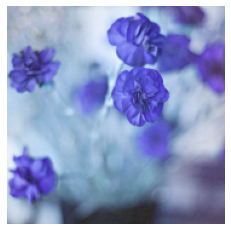

In [22]:
plt.axis('off')
plt.imshow(x[0])

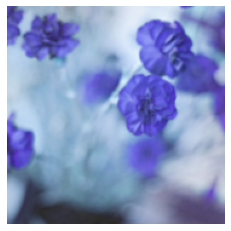

In [23]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

With droput layers

In [24]:
num_classes=5

model = Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train_scaled, y_train, epochs=5) 

Epoch 1/5
86/86 [==============================] - 108s 1s/step - loss: 1.3437 - accuracy: 0.4106
Epoch 2/5
86/86 [==============================] - 99s 1s/step - loss: 1.0606 - accuracy: 0.5767
Epoch 3/5
86/86 [==============================] - 99s 1s/step - loss: 0.9278 - accuracy: 0.6344
Epoch 4/5
86/86 [==============================] - 99s 1s/step - loss: 0.8528 - accuracy: 0.6621
Epoch 5/5
86/86 [==============================] - 100s 1s/step - loss: 0.8082 - accuracy: 0.6911


In [27]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 11s 362ms/step - loss: 0.9993 - accuracy: 0.6481


[0.9992601871490479, 0.6481481194496155]